# LFA - Projet 2017
## Steroïds et BMI

### Simon Baehler et Thibault Schowing

#### Contexte 

Les données proviennent du projet SKIPOGH. *SKIPOGH (Swiss Kidney Project on Genes in Hypertension) est l’acronyme du Projet Suisse sur la génétique de l’hypertension et du rein; son but est d'explorer le rôle de la génétique et de l'environnement (la nutrition, l'activité physique et le mode de vie) sur la régulation de la pression sanguine ainsi que la fonction des reins. SKIPOGH vise également à enrichir les connaissances sur les statuts de santé des habitants des cantons de Lausanne, Genève et Berne. Cette étude permettra aux scientifiques d'évaluer à quel degré les paramètres tels que la tension, la taille des reins et ses fonctions, le poids corporel et le métabolisme sont héréditaires. L'étude SKIPOGH fait partie de EPOGH (Projet européen sur les gènes dans l'hypertension), une étude internationale explorant les déterminants génétiques de la tension artérielle (BP) dans la population générale et suit en grande partie le même protocole standardisé.* (http://www.skipogh.ch, Consulté le 09.03.2017)


Ce set de données contient des informations concernant les quantités de divers stéroïdes naturels dans plus de 1’120 personnes. Ce set de données est composé de 40 variables d’entrée qui représentent, chacune, 1 stéroïde différent exprimée par une valeur continue et une variable de sortie représentant la valeur de l’IMC.


**Quel est la provenance des données (c'est bien skipogh ?) ça vient de l'urine ou du sang ? Quelles sont les unités de mesures ?**

-> urine (test cumulé 12h journée 12h nuit ou 24h - vérifier) 
## Todo: 


|Variable	|Info|
|----------|----------|
|ccr_andro_d	|androgens|
|ccr_etio_d	|androgens|
|ccr_s_ad_17b_d	|androgens|
|ccr_s_at_d	|androgens|
|ccr_sa_dihydrotest_d	|androgens|
|ccr_saad3a17b_d	|androgens|
|ccr_testosterone_d	|androgens|
|ccr_estriol_d	|estrogens|
|ccr_l7b_estradiol_d	|estrogens|
|ccr_dha_d	androgen |precursors|
|ccr_l6a_oh_dha_d	|androgen precursors|
|ccr_s_pt_d	|androgen precursors|
|ccr_tha_d	|mineralocorticoid and precursors|
|ccr_thb_d	|mineralocorticoid and precursors|
|ccr_sa_thb_d	|mineralocorticoid and precursors|
|ccr_thaldo_d	|mineralocorticoid and precursors|
|ccr_thdoc_d	|mineralocorticoid and precursors|
|ccr_l8_oh_tha_d	|mineralocorticoid and precursors|
|ccr_pd_d	|glucocorticoid precursors|
|ccr_l7_HP_d	|glucocorticoid precursors|
|ccr_pt_d|	glucocorticoid precursors|
|ccr_pt_one_d|	glucocorticoid precursors|
|ccr_ths_d	|glucocorticoid precursors|
|ccr_cortisol_d	|glucocorticoids|
|ccr_l8_oh_f_d	|glucocorticoids|
|ccr_thf_d|	glucocorticoids|
|ccr_sa_thf_d|	glucocorticoids|
|ccr_a_cortol_d	|glucocorticoids|
|ccr_b_cortol_d	|glucocorticoids|
|ccr_llb_oh_andro_d|	glucocorticoids|
|ccr_llb_oh_etio_d	|glucocorticoids|
|ccr_cortisone_d	|glucocorticoids|
|ccr_the_d	|glucocorticoids|
|ccr_a_cortolone_d	|glucocorticoids|
|ccr_b_cortolone_d	|glucocorticoids|
|ccr_ll_oxo_etio_d|	glucocorticoids|
|ccr_sb_oh_f_d	|glucocorticoids|
|ccr_zoa_dhe_d|	glucocorticoids|
|ccr_zoa_dhf_d	|glucocorticoids|
|ccr_zob_dhe_d|	glucocorticoids|
|ccr_zob_dhf_d| Glucocorticoids|
|IMC	|Indice de masse corporelle|


# Question de recherche

L'objectif de ce projet est de savoir si l'indice de masse corporelle (IMC ou BMI en anglais) est lié à la quantité de stéroïdes présents dans le corps. Dans le cas où l'algorithme nous permettrait de réaliser une bonne classification, il faudrait trouver quels sont les stéroïdes qui sont les plus affectés par l'IMC. Dans le cas ou la classification ne serait pas pertinante, d'autres questions pourraient être posées, par exemple déterminer s'il y a un impact des stéroïdes sur la pression systolique ou diastolique. 




# Exploration



[['0' '1' '2' ..., '1126' '1127' '1128']
 ['1' '2' '1' ..., '2' '0' '3']]
(1, 41)
[ 480.  380.  112.   54.   21.   19.   12.    8.    5.    1.    0.    0.
    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.   36.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


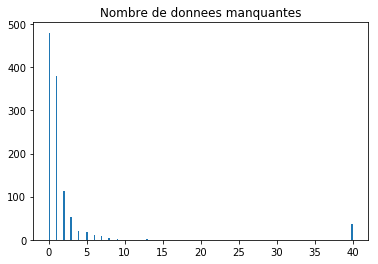

In [78]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.spatial.distance as ssd
from random import randint
from random import shuffle
import glob
import plotly.plotly as py

%matplotlib inline 




# Skipogh Steroids_cat2.csv
path = './datas/'

# Reading file
records_matrix = open(path + 'Skipogh Steroids_original.csv')

# Reading the data 
matrice =  [l.strip().split(';') for l in records_matrix.readlines()[1::]]

# Reading the 
records_matrix.seek(0)
steroid = records_matrix.readlines()[0].strip().split(';')

# Conversion of read lists to ndarrays.
matrice = np.array(matrice)
steroid = np.array(steroid[1:])

#print steroid
#print matrice

missing_participant = []

i = 0
for participant in matrice:
    missing_participant.append([participant[0]])
    
    missing = 0
    for data in participant[1:-1]:
        
        if(data == ''):
            missing = missing + 1
            
    missing_participant[i].append(missing)
    i = i + 1
    

missing_participant = np.array(missing_participant)
transposed = missing_participant.transpose()
transposed_val_int = []
for elem in transposed[1]:
    transposed_val_int.append(int(elem))
print transposed


count_missing_data = [np.zeros(41)]
count_missing_data = np.array(count_missing_data)
print count_missing_data.shape

count_missing_data = count_missing_data[0]
count_missing_data

for i in range(1129):
    count_missing_data[int(transposed[1][i])] = count_missing_data[int(transposed[1][i])] + 1


print count_missing_data   
print range(41)
    
plt.hist(transposed_val_int,  bins='auto')
plt.title("Nombre de donnees manquantes")
plt.show()